In [1]:
import numpy as np

In [2]:
def sigmoid(x):
    return 1.0/(1.0+np.exp(-x))

In [3]:
def sigtheta(theta,xval):
    return theta[0]*sigmoid(theta[1]+theta[2]*xval)

In [5]:
def mu(theta,xval):
    out = 0
    j = len(theta)
    for i in range(0,j,3):
        out += theta[i]*sigmoid(theta[i+1]+theta[i+2]*xval)
    return out

In [6]:
def scale_theta(theta,factor):
    j = len(theta)
    factor_vec = np.ones(j)
    for i in range(0,j,3):
        factor_vec[i] = factor
    return factor_vec*theta

In [7]:
mydata=np.linspace(0,2*np.pi,1000)

In [8]:
def myip(theta1,theta2,data):
    N = len(data)
    return (1.0/N)*np.sum(mu(theta1,mydata)*mu(theta2,mydata))

In [30]:
def random_initial_theta(n):
    theta = np.ones(n)
    for i in range(1,n,3):
        theta[i:i+2] = np.random.randn(2)
    return theta

In [10]:
my_theta = random_initial_theta(12)
print my_theta

[ 1.          2.83117475  1.48005295  1.         -0.43417636  1.99839397
  1.          5.38785027  1.56734854  1.          3.08999697  0.46488654]


In [11]:
def basis_from_theta(theta):
    n = len(theta)
    B = []
    for i in range(0,n,3):
        newtheta = np.zeros(i+3)
        newtheta[i:i+3] = np.array(theta[i:i+3])
        B.append(newtheta)
    return B

In [12]:
myB = basis_from_theta(my_theta)
print myB

[array([ 1.        ,  2.83117475,  1.48005295]), array([ 0.        ,  0.        ,  0.        ,  1.        , -0.43417636,
        1.99839397]), array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  1.        ,  5.38785027,  1.56734854]), array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
        3.08999697,  0.46488654])]


In [13]:
def sig_gram_schmidt(B,data):
    E = []
    
    norm0 = np.sqrt(myip(B[0],B[0],mydata))
    E0 = scale_theta(B[0],1/norm0)
    E.append(E0)

    f1=np.copy(B[1])
    scale = - myip(E[0],f1,mydata)
    f1[:3] = scale_theta(E[0],scale)
    norm1 = np.sqrt(myip(f1,f1,mydata))
    E1 = scale_theta(f1,1/norm1)
    E.append(E1)

    f2 = np.copy(B[2])
    scale0 = - myip(E[0],B[2],mydata)
    scale1 = - myip(E[1],B[2],mydata)
    
    f2[:6] = scale_theta(E[1],scale1)
    f2[0]+=scale0*E[0][0]
    norm2 = np.sqrt(myip(f2,f2,mydata))
    E2 = scale_theta(f2,1/norm2)
    E.append(E2)

    f3 = np.copy(B[3])
    scale0 = - myip(E[0],B[3],mydata)
    scale1 = - myip(E[1],B[3],mydata)
    scale2 = - myip(E[2],B[3],mydata)

    f3[:9] = scale_theta(E[2],scale2)
    f3[3] += scale1*E[1][3]
    f3[0] += scale1*E[1][0]
    f3[0] += scale0*E[0][0]
    norm3 = np.sqrt(myip(f3,f3,mydata))
    E3 = scale_theta(f3,1/norm3)
    E.append(E3)
    
    return E

In [14]:
myE = sig_gram_schmidt(myB,mydata)

In [15]:
myE

[array([ 1.0061488 ,  2.83117475,  1.48005295]),
 array([-7.02620931,  2.83117475,  1.48005295,  7.5329205 , -0.43417636,
         1.99839397]),
 array([ -1.18668523e+03,   2.83117475e+00,   1.48005295e+00,
          8.91113585e+01,  -4.34176358e-01,   1.99839397e+00,
          1.09739795e+03,   5.38785027e+00,   1.56734854e+00]),
 array([  64.82553442,    2.83117475,    1.48005295,  -17.77693165,
          -0.43417636,    1.99839397, -246.01188695,    5.38785027,
           1.56734854,  200.81622454,    3.08999697,    0.46488654])]

In [16]:
ips=np.zeros((4,4))
for i in range(4):
    for j in range(4):
        ips[i,j]=myip(myE[i],myE[j],mydata)
print ips

[[  1.00000000e+00  -5.68434189e-16   1.77770687e-13  -6.45172804e-14]
 [ -5.68434189e-16   1.00000000e+00   6.22108587e-13  -1.73088210e-14]
 [  1.77770687e-13   6.22108587e-13   1.00000000e+00  -3.50081635e-11]
 [ -6.45172804e-14  -1.73088210e-14  -3.50081635e-11   1.00000000e+00]]


In [17]:
def orthoproject(E,data):
    N = len(data)
    coeffs = []
    theta_out = np.zeros(12)
    for ei in E:
        coeff = 1.0/N*np.sum(np.sin(mydata)*mu(ei,mydata))
        coeffs.append(coeff)
    theta_out = scale_theta(E[3],coeffs[3])
    theta_out[6] += coeffs[2]*E[2][6]
    theta_out[3] += coeffs[2]*E[2][3]
    theta_out[0] += coeffs[2]*E[2][0]
    theta_out[3] += coeffs[1]*E[1][3]
    theta_out[0] += coeffs[1]*E[1][0]
    theta_out[0] += coeffs[0]*E[0][0]
    return theta_out

In [18]:
my_test_theta=orthoproject(myE,mydata)

In [19]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

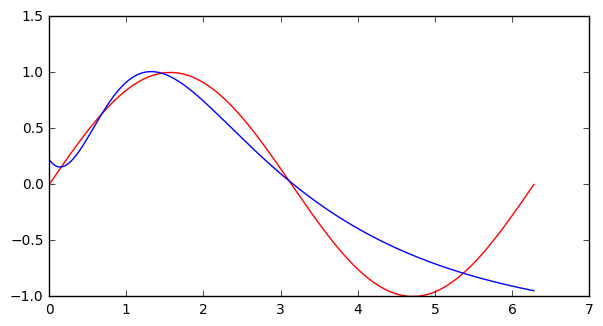

In [20]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.7]) 
axes.plot(mydata,np.sin(mydata),c="r");
axes.plot(mydata,mu(my_test_theta,mydata),c="b");

In [31]:
for i in range(40000):
    B = basis_from_theta(random_initial_theta(12))
    E = sig_gram_schmidt(B,mydata)
    my_theta=orthoproject(E,mydata)
    trial = (1.0/1000)*np.sum((np.sin(mydata)-mu(my_theta,mydata))**2)
    if trial < best:
        best = trial
        print "new best found", best
        best_theta = np.copy(my_theta)
print "best is", best
print best_theta

new best found 8.24471426294e-05


new best found 2.95290359863e-05


best is 2.95290359863e-05
[ 33.37297664  -1.57104526   0.38588102  -4.76528849   1.50911863
  -0.90883989 -29.92948801  -1.94205095   0.68376755   4.04704312
  -0.12518974   0.85365515]


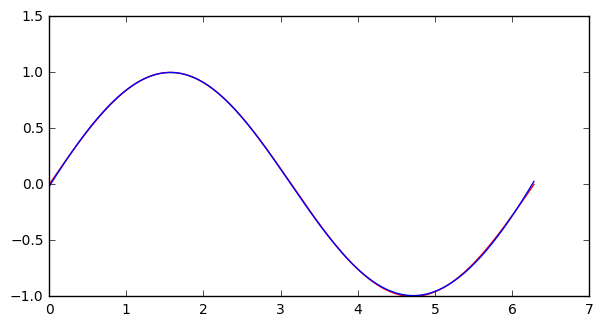

In [32]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.7]) 
axes.plot(mydata,np.sin(mydata),c="r");
axes.plot(mydata,mu(best_theta,mydata),c="b");

In [0]:
for i in range(100000):
    B = basis_from_theta(random_initial_theta(12))
    E = sig_gram_schmidt(B,mydata)
    my_theta=orthoproject(E,mydata)
    trial = (1.0/1000)*np.sum((np.sin(mydata)-mu(my_theta,mydata))**2)
    if trial < best:
        best = trial
        print "new best found", best
        best_theta = np.copy(my_theta)
print "best is", best
print best_theta

In [33]:
np.save('best_theta',best_theta)

In [25]:
saved_best_theta=np.load('best_theta.npy')

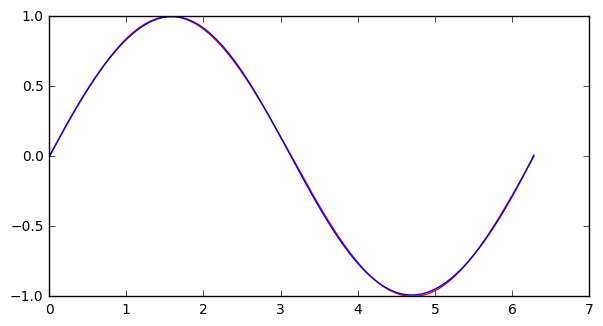

In [26]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.9, 0.7]) 
axes.plot(mydata,np.sin(mydata),c="r");
axes.plot(mydata,mu(saved_best_theta,mydata),c="b");

In [27]:
(1.0/1000)*np.sum((np.sin(mydata)-mu(best_theta,mydata))**2)

0.00027411998295621471

In [28]:
(1.0/1000)*np.sum((np.sin(mydata)-mu(saved_best_theta,mydata))**2)

4.6702398457301524e-05